 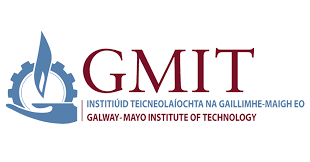

# Fundamentals for Data Analysis Project 2020


**Author:**  Richard Deegan 
 
 
 **Lecturer:** Ian McLoughlin
 
 **Student ID:** G00387896@gmit.ie

# Problem Statement:

In this project you must perform and explain simple linear regression using Python on the powerproduction dataset available on [Moodle](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv). The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis. Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.


2. In that notebook, an explanation of your regression and an analysis of its accuracy.


3. Standard items in a git repository such as a README.

A full set of instructions can be found [here](https://github.com/Deego88/FoDA_Project_2020/blob/master/Images_FoDA_Project_2020/FoDA_Project_2020.pdf)

# Preliminaries

In order to effectively answer the Problem Statement various relevant libraries must be imported. For this we will import Numpy as it contains essential libraries. Pandas to assist with data analysis and manipulation. Matplotlib.plyplot and Seaborn libraries will be utilised to assist in the visualisation of numbers to user friendly graphs.



In [15]:
# import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The magic inline command will be utilised in order to ensure the correct display of the plots within the Jupyter Notebook. This will allow the plots to be rendered inline within the Notebook [1].

In [16]:
# magic command used to visualise plots in Jupyter
%matplotlib inline

Drawing attractive figures is important. When making figures for yourself, as you explore a dataset, it’s nice to have plots that are pleasant to look at. Visualizations are also central to communicating quantitative insights to an audience, and in that setting it’s even more necessary to have figures that catch the attention and draw a viewer in. The plot aesthetics will be set from the outset in order to standardise the format [2].

In [17]:
# setting the style of the graphs to be displayed (colour and size)
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Introduction

Regression analysis is a conceptually simple method for investigating functional relationships amoung variables. For example a real estate appraiser may wish to conduct an analysis on the relationship between the sale price of a house and from selected physical characteristics of the house. The relationships are expressed in the form of an equation which connects  the response or dependent variable and one or more explanatory or predictor variables. In this instance the dependent variable would be sale price of them home, as this is dependent on the other variables, this might be the square foot size for example [3].

It will also give you other statistics (including a p-value and a correlation coefficient) to tell you how accurate your model is. A p value is used in hypothesis testing to help you support or reject the null hypothesis. The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. Also, the Correlation coefficients are used to measure how strong a relationship is between two variables [4].

**Choosing a Linear Regression Analysis**

In most statistical packages, a curve estimation procedure produces curve estimation regression statistics and related plots for many different models (linear, logarithmic, inverse, quadratic, cubic, power, S-curve, logistic, exponential etc.). It is essential to plot the data in order to determine which model to use for each depedent variable. If the variables appear to be related linearly, a simple linear regression model can be used but in the case that the variables are not linearly related, data transformation might help. If the transformation does not help then a more complicated model may be needed. It is strongly advised to view early a scatterplot of your data; if the plot resembles a mathematical function you recognize, fit the data to that type of model. For example, if the data resemble an exponential function, an exponential model is to be used. Alternatively, if it is not obvious which model best fits the data, an option is to try several models and select among them. It is strongly recommended to screen the data graphically (e.g. by a scatterplot) in order to determine how the independent and dependent variables are related (linearly, exponentially etc.) [5, 6]

# First Look at the data

In [18]:
# Import CSV data set from moodle link
wind_turbine_dataset = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
wind_turbine_dataset

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [23]:
# conduct visual inspection of full data set
pd.set_option('display.max_rows', None)
powerproduction_dataset

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [24]:
# check if there are any null values in the data set
pd.set_option('display.max_rows', None)
powerproduction_dataset.isnull()

,speed,power
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [21]:
# brief describtion of data set
wind_turbine_dataset.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


# References


[1] I-Python built-in Magic Commands https://ipython.readthedocs.io/en/stable/interactive/magics.html

[2] Seaborn Controlling figure aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html

[3] Chatterjee, S. and Hadi, A.S., 2015. Regression analysis by example. John Wiley & Sons.

[4] Stephanie Glen - Regression Analysis, https://www.statisticshowto.com/probability-and-statistics/regression-analysis/

[5] Draper, N.R. and Smith, H., 1998. Applied regression analysis (Vol. 326). John Wiley & Sons.

[6] Munro, B.H., 2005. Statistical methods for health care research (Vol. 1). lippincott williams & wilkins.
